In [15]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.special import softmax
from scipy.stats import entropy
import seaborn as sns

In [21]:
df = pd.read_parquet("logits_Chr5:3564493-3565087.parquet")
df

,pos,chromosome,A,C,G,T
0,3564493,Chr5,0.421440,-0.365158,0.074639,0.308627
1,3564494,Chr5,-0.032921,-0.312647,-0.127695,0.905883
2,3564495,Chr5,0.709715,-0.302096,-0.381345,0.399743
3,3564496,Chr5,0.434177,-0.022004,0.022992,0.011067
4,3564497,Chr5,0.431310,-0.253834,0.094039,0.159962
...,...,...,...,...,...,...
589,3565082,Chr5,-0.239208,0.172251,-0.674126,1.169071
590,3565083,Chr5,1.194417,-0.804172,-0.205994,0.199890
591,3565084,Chr5,-0.181992,0.079760,-0.879391,1.409554
592,3565085,Chr5,0.728978,-0.045376,-0.400706,0.120446


In [22]:
genome = SeqIO.to_dict(SeqIO.parse("../../data/mlm/tair10.fa", "fasta"))
genome

{'Chr1': SeqRecord(seq=Seq('CCCTAAACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCCCTAAATCC...GGG'), id='Chr1', name='Chr1', description='Chr1 1 CHROMOSOME dumped from ADB: Feb/3/09 16:9; last updated: 2009-02-02', dbxrefs=[]),
 'Chr2': SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...GGG'), id='Chr2', name='Chr2', description='Chr2 2 CHROMOSOME dumped from ADB: Feb/3/09 16:10; last updated: 2009-02-02', dbxrefs=[]),
 'Chr3': SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...CCC'), id='Chr3', name='Chr3', description='Chr3 3 CHROMOSOME dumped from ADB: Feb/3/09 16:10; last updated: 2009-02-02', dbxrefs=[]),
 'Chr4': SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...AGG'), id='Chr4', name='Chr4', description='Chr4 4 CHROMOSOME dumped from ADB: Feb/3/09 16:10; last updated: 2009-02-02', dbxrefs=[]),
 'Chr5': SeqRecord(seq=Seq('TATACCATGTACCCTCAACCTTAAAACCCTAAAACCTATACTATAAATCTTTAA...ATC'), id='Chr5', name='Chr5', descr

In [23]:
df["ref_nuc"] = df.apply(lambda row: genome[row.chromosome][row.pos], axis=1)
df

,pos,chromosome,A,C,G,T,ref_nuc
0,3564493,Chr5,0.421440,-0.365158,0.074639,0.308627,T
1,3564494,Chr5,-0.032921,-0.312647,-0.127695,0.905883,A
2,3564495,Chr5,0.709715,-0.302096,-0.381345,0.399743,T
3,3564496,Chr5,0.434177,-0.022004,0.022992,0.011067,T
4,3564497,Chr5,0.431310,-0.253834,0.094039,0.159962,A
...,...,...,...,...,...,...,...
589,3565082,Chr5,-0.239208,0.172251,-0.674126,1.169071,T
590,3565083,Chr5,1.194417,-0.804172,-0.205994,0.199890,A
591,3565084,Chr5,-0.181992,0.079760,-0.879391,1.409554,T
592,3565085,Chr5,0.728978,-0.045376,-0.400706,0.120446,G


In [24]:
nucleotides = ["A", "C", "G", "T"]

In [25]:
df_llr = df.copy()
for nucleotide in nucleotides:
    df_llr[nucleotide] = df_llr.apply(lambda row: row[nucleotide]-row[row.ref_nuc], axis=1)
df_llr

,pos,chromosome,A,C,G,T,ref_nuc
0,3564493,Chr5,0.112814,-0.673784,-0.233988,0.000000,T
1,3564494,Chr5,0.000000,-0.312647,-0.127695,0.905883,A
2,3564495,Chr5,0.309972,-0.701839,-0.781088,0.000000,T
3,3564496,Chr5,0.423109,-0.033071,0.011925,0.000000,T
4,3564497,Chr5,0.000000,-0.253834,0.094039,0.159962,A
...,...,...,...,...,...,...,...
589,3565082,Chr5,-1.408279,-0.996820,-1.843197,0.000000,T
590,3565083,Chr5,0.000000,-0.804172,-0.205994,0.199890,A
591,3565084,Chr5,-1.591546,-1.329794,-2.288945,0.000000,T
592,3565085,Chr5,1.129684,0.355331,0.000000,0.120446,G


In [28]:
df.loc[:, nucleotides] = softmax(df[nucleotides].values, axis=1)
df

,pos,chromosome,A,C,G,T,ref_nuc
0,3564493,Chr5,0.327262,0.149032,0.231357,0.292349,T
1,3564494,Chr5,0.191480,0.144757,0.174166,0.489598,A
2,3564495,Chr5,0.411034,0.149436,0.138050,0.301480,T
3,3564496,Chr5,0.338803,0.214699,0.224580,0.221918,T
4,3564497,Chr5,0.335561,0.169129,0.239495,0.255815,A
...,...,...,...,...,...,...,...
589,3565082,Chr5,0.138021,0.208277,0.089344,0.564358,T
590,3565083,Chr5,0.570802,0.077359,0.140700,0.211139,A
591,3565084,Chr5,0.129728,0.168544,0.064589,0.637139,T
592,3565085,Chr5,0.429500,0.198000,0.138787,0.233712,G


In [43]:
for nucleotide in nucleotides:
    df[f"ref_1hot_{nucleotide}"] = df.apply(lambda row: 1.0 if row.ref_nuc==nucleotide else 0.0, axis=1)
df

,pos,chromosome,A,C,G,T,ref_nuc,1hot_A,1hot_C,1hot_G,1hot_T,ref_1hot_A,ref_1hot_C,ref_1hot_G,ref_1hot_T
0,3564493,Chr5,0.327262,0.149032,0.231357,0.292349,T,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
1,3564494,Chr5,0.191480,0.144757,0.174166,0.489598,A,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
2,3564495,Chr5,0.411034,0.149436,0.138050,0.301480,T,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
3,3564496,Chr5,0.338803,0.214699,0.224580,0.221918,T,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
4,3564497,Chr5,0.335561,0.169129,0.239495,0.255815,A,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,3565082,Chr5,0.138021,0.208277,0.089344,0.564358,T,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
590,3565083,Chr5,0.570802,0.077359,0.140700,0.211139,A,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
591,3565084,Chr5,0.129728,0.168544,0.064589,0.637139,T,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
592,3565085,Chr5,0.429500,0.198000,0.138787,0.233712,G,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0


In [54]:
np.log

<ufunc 'log'>

In [74]:
def cross_entropy(y, y_pre):
    loss = -np.sum(y*np.log(y_pre))
    return loss/float(y_pre.shape[0])

In [75]:
cross_entropy(np.array([0, 1.0, 0]), np.array([0.01, 0.98, 0.01]))

0.006734235772506488

In [76]:
true_cols = [f"ref_1hot_{nucleotide}" for nucleotide in nucleotides]
pred_cols = nucleotides
df["cross_entropy"] = df.apply(lambda row: cross_entropy(row[true_cols].values.astype('float64'), row[pred_cols].values.astype('float64')), axis=1)
df

,pos,chromosome,A,C,G,T,ref_nuc,1hot_A,1hot_C,1hot_G,1hot_T,ref_1hot_A,ref_1hot_C,ref_1hot_G,ref_1hot_T,cross_entropy
0,3564493,Chr5,0.327262,0.149032,0.231357,0.292349,T,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.307452
1,3564494,Chr5,0.191480,0.144757,0.174166,0.489598,A,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.413244
2,3564495,Chr5,0.411034,0.149436,0.138050,0.301480,T,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.299763
3,3564496,Chr5,0.338803,0.214699,0.224580,0.221918,T,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.376362
4,3564497,Chr5,0.335561,0.169129,0.239495,0.255815,A,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.272988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,3565082,Chr5,0.138021,0.208277,0.089344,0.564358,T,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.143017
590,3565083,Chr5,0.570802,0.077359,0.140700,0.211139,A,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.140178
591,3565084,Chr5,0.129728,0.168544,0.064589,0.637139,T,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.112692
592,3565085,Chr5,0.429500,0.198000,0.138787,0.233712,G,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.493704


In [77]:
df["perplexity"] = np.exp(df.cross_entropy)

<AxesSubplot:>

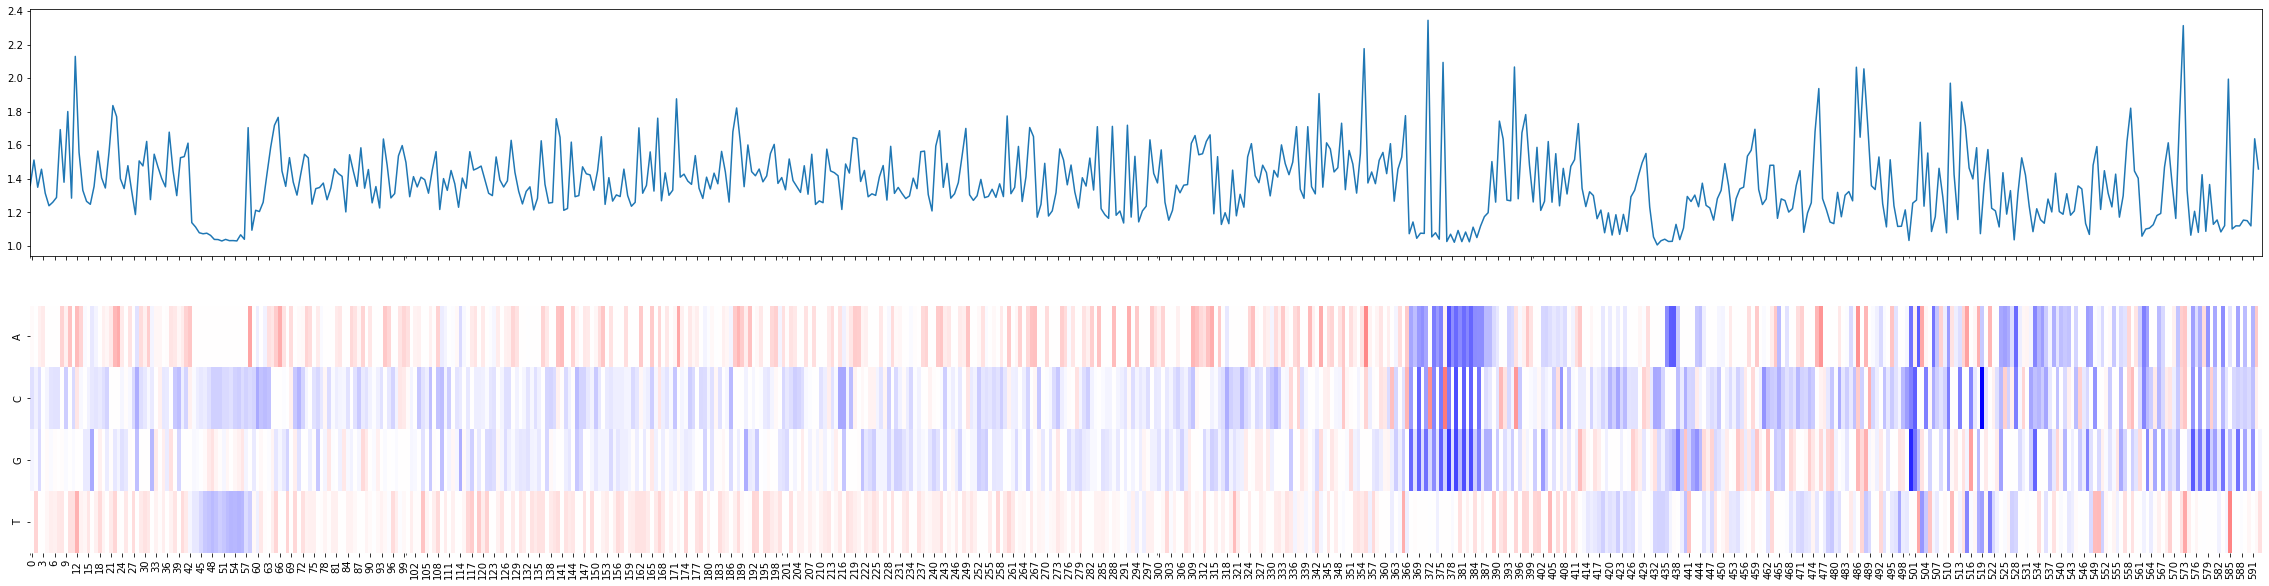

In [94]:
#plt.figure(figsize=(40, 5))

fig, axes = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(40, 10))

#sns.lineplot(data=df, y="perplexity", x="pos", ax=axes[0])
df.perplexity.plot(ax=axes[0])

sns.heatmap(
    data=df_llr[nucleotides].T,
    #square=True,
    cbar=False,
    cbar_kws={"orientation": "vertical", "shrink": .05, "label": "LLR"},
    center=0,
    cmap="bwr",
    #annot=annot,
    #fmt = ''
    ax=axes[1]
)
